# **Introduction**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# **Column Profiling:**

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination
is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field


# **Problem Statement**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

## **Concepts Used:**

Feature Creation

Relationship between Features

Column Normalization /Column Standardization

Handling categorical values

Missing values - Outlier treatment / Types of outliers

# **Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind,ttest_1samp,ttest_rel


In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181" -O "delhivery_data.csv"

--2024-08-10 18:51:17--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.102, 13.35.37.31, 13.35.37.159, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   199MB/s    in 0.3s    

2024-08-10 18:51:17 (199 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



# **1.Basic data cleaning and exploration**

In [ ]:
df=pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.size

3476808

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
# Dropping unknown columns
df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [ ]:
# Drop null values
df.dropna(inplace=True)

In [ ]:
df.duplicated().value_counts()

,count
False,144316


In [ ]:
df.nunique()

,0
data,2
trip_creation_time,14787
route_schedule_uuid,1497
route_type,2
trip_uuid,14787
source_center,1496
source_name,1496
destination_center,1466
destination_name,1466
od_start_time,26223


In [ ]:
df['data'].unique()

array(['training', 'test'], dtype=object)

In [ ]:
df['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

In [ ]:
df.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
#Converting time columns into pandas datetime.
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
df_original=df.copy()

# **2.Build some features to prepare the data for actual analysis.**
1. Grouping by segment
a. Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.
b. You can use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time,
segment_osrm_distance, segment_osrm_time based on the
segment_key.
c. This way you’ll get new columns named segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum.

2. Aggregating at segment level
a. Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.
i. You can keep the first and last values for some
numeric/categorical fields if aggregating them won’t make sense.
b. Further group the data by segment_key because you want to perform
aggregation operations for different segments of each trip based on the
segment_key value.
c. The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.
d. Sort the resulting DataFrame segment, by two criteria:
i. First, it sorts by segment_key to ensure that segments are
ordered consistently.
ii. Second, it sorts by od_end_time in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.

In [ ]:
df['trip_uuid']=df['trip_uuid'].astype(str).str.split('-').str[1]
df['trip_uuid'].head()

,trip_uuid
0,153741093647649320
1,153741093647649320
2,153741093647649320
3,153741093647649320
4,153741093647649320


In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

}


In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
segment['od_time_diff_hour'] = (pd.to_datetime(segment['od_end_time']) - pd.to_datetime(segment['od_start_time'])).dt.total_seconds() /(60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


In [ ]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,26218,153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,26219,153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,26220,153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [ ]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [ ]:
trip= segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


# **3. Feature Engineering:**

Extract features from the below fields:
1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.

2. Destination Name: Split and extract features out of destination. City-place-code
(State)

3. Source Name: Split and extract features out of destination. City-place-code
(State)

4. Trip_creation_time: Extract features like month, year, day, etc.

In [ ]:
def extract_state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def extract_city(x):
    #we will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]


    return city

def extract_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]

def extract_code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: extract_state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: extract_city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: extract_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: extract_code(x))

In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: extract_state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: extract_city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: extract_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: extract_code(x))

In [ ]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,1320.4733,1008.0,Uttar Pradesh,Kanpur,Central,6,Uttar Pradesh,Kanpur,Central,6
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,84.1894,65.0,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,2545.2678,1941.0,Haryana,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,19.8766,16.0,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,Mumbai,none
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,146.7919,115.0,Karnataka,Sandur,WrdN1DPP,D,Karnataka,Bellary,Bellary,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,64.8551,62.0,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,16.0883,11.0,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,...,104.8866,88.0,Uttar Pradesh,Kanpur,GovndNgr,DC,Uttar Pradesh,Kanpur,GovndNgr,DC
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,223.5324,221.0,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [ ]:
trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


# **4. In-depth analysis:**
1. Grouping and Aggregating at Trip-level
a. Groups the segment data by the trip_uuid column to focus on
aggregating data at the trip level.
b. Apply suitable aggregation functions like first, last, and sum specified in
the create_trip_dict dictionary to calculate summary statistics for each
trip.

2. Outlier Detection & Treatment
a. Find any existing outliers in numerical features.
b. Visualize the outlier values using Boxplot.
c. Handle the outliers using the IQR method.
3. Perform one-hot encoding on categorical features.
4. Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler.

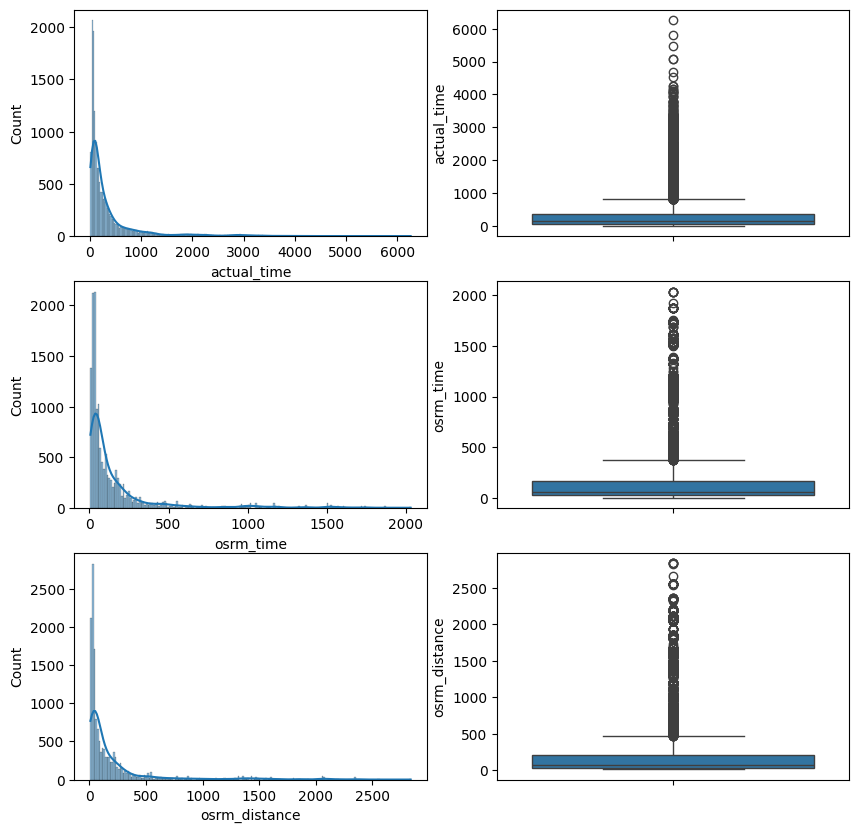

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip['actual_time'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip['actual_time'])

sns.histplot(ax=axs[1,0],data= trip['osrm_time'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip['osrm_time'])

sns.histplot(ax=axs[2,0],data= trip['osrm_distance'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip['osrm_distance'])


plt.show()

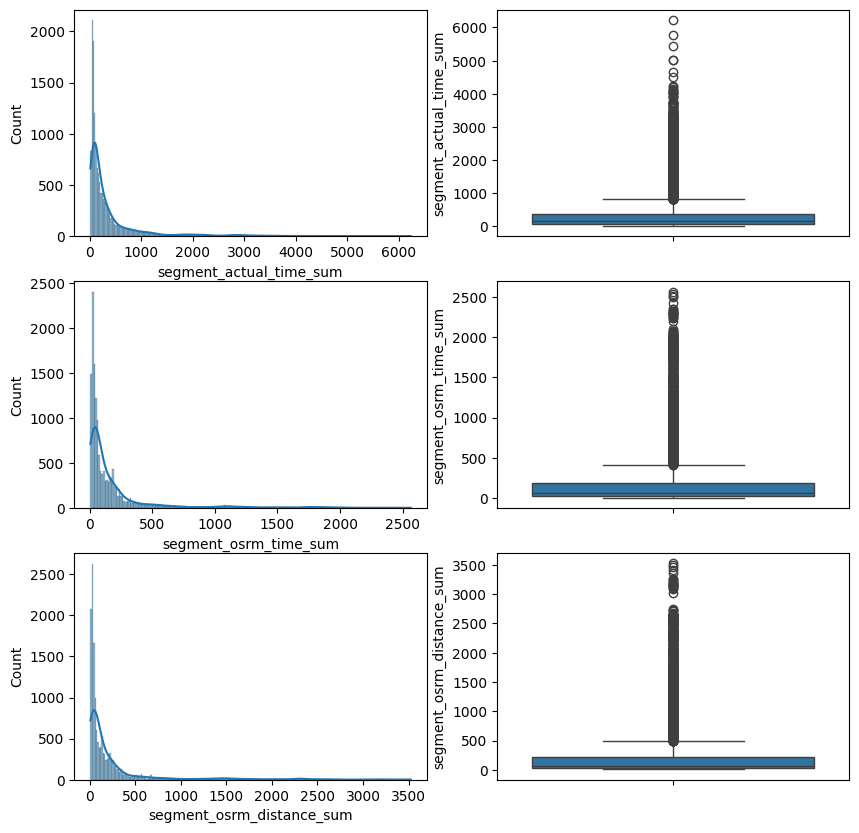

In [ ]:
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip['segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip['segment_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip['segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip['segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip['segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip['segment_osrm_distance_sum'])


plt.show()

In [ ]:
def clip_value_helper(row,cl, Q1,Q3, minval, maxval):
    #     Q1=row[cl].quantile(0.25)
    #     Q3=row[cl].quantile(0.75)
    #     minval=min(row[cl])
    #     maxval=max(row[cl])
    IQR=Q3-Q1
    if row[cl]<Q1-1.5*IQR:
        return min(minval, Q1-1.5*IQR)
    elif row[cl] > Q3+1.5*IQR:
        return min(maxval, Q3+1.5*IQR)
    else:
        return row[cl]

In [ ]:
for cl in ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum','segment_osrm_time_sum', 'segment_osrm_distance_sum','od_time_diff_hour']:
    Q1=trip[cl].quantile(0.25)
    Q3=trip[cl].quantile(0.75)
    minval=min(trip[cl])
    maxval=max(trip[cl])
    trip[cl]=trip.apply(lambda row:clip_value_helper(row,cl,Q1,Q3,minval, maxval) , axis=1)

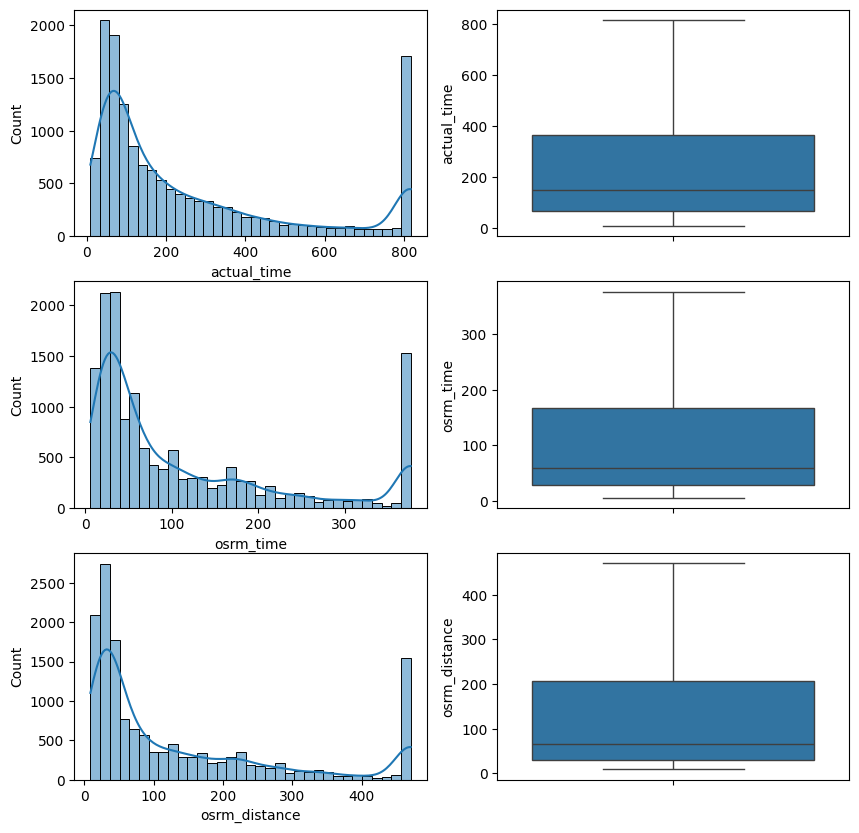

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip['actual_time'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip['actual_time'])

sns.histplot(ax=axs[1,0],data= trip['osrm_time'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip['osrm_time'])

sns.histplot(ax=axs[2,0],data= trip['osrm_distance'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip['osrm_distance'])


plt.show()

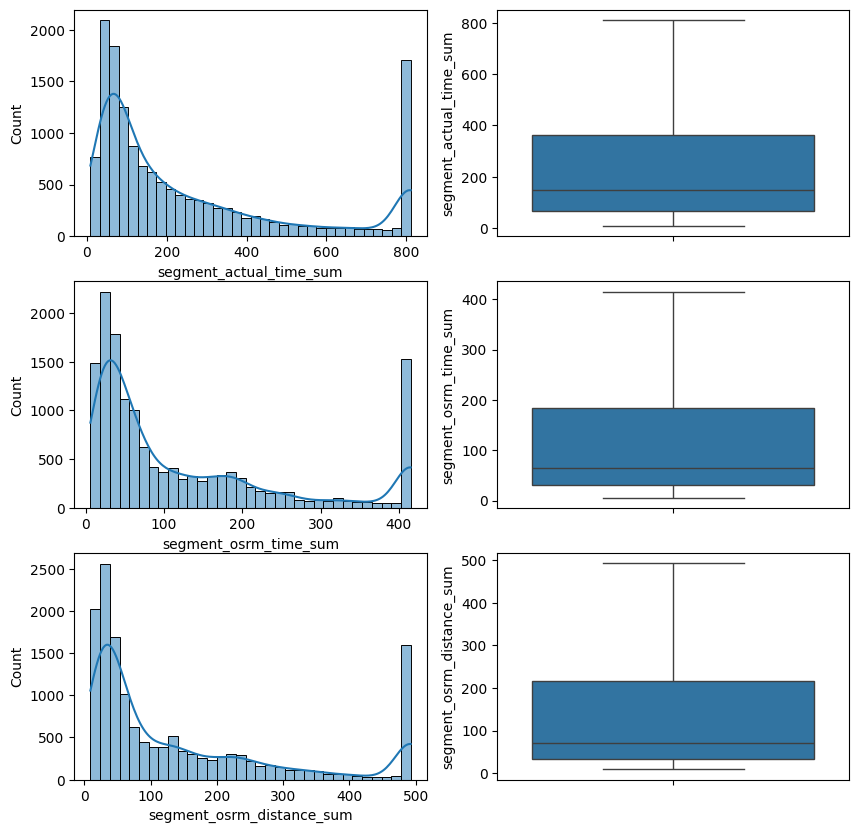

In [ ]:
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip['segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip['segment_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip['segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip['segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip['segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip['segment_osrm_distance_sum'])


plt.show()

In [ ]:
#Here We will use label encoder for encoding route_type column
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
le = LabelEncoder()
trip['route_type'] = le.fit_transform(trip['route_type'])
trip['route_type'].value_counts()

,count
route_type,
0,8906
1,5881


# **5. Hypothesis Testing:**

1. Perform hypothesis testing / visual analysis between :

   a. actual_time aggregated value and OSRM time aggregated value.

   b. actual_time aggregated value and segment actual time aggregated
   value.

   c. OSRM distance aggregated value and segment OSRM distance
   aggregated value.

   d. OSRM time aggregated value and segment OSRM time aggregated
   value.

2. Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid.

In [ ]:
trip[['actual_time','osrm_time']]

,actual_time,osrm_time
0,817.0,376.5
1,143.0,68.0
2,817.0,376.5
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


In [ ]:
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel

In [ ]:
# we will use ttest  sample test to know if there is significant difference in actual trip aggregated time and OSRM trip aggregated time for each trip

# HO : mean Actual time to deliver package from source to destination is lesser than OSRM time for entire trip

# HA: mean Actual time to deliver package from source to destination is greater than OSRM time

ttest_value,p_value= ttest_ind(trip['actual_time'],trip['osrm_time'],equal_var=False,alternative='greater')

print("ttest statistic value ", ttest_value)
print("p-value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis, indicates that mean actual time is greater than the mean OSRM time")
else:
  print("Fail to reject  Null Hypothesis,indicates that mean actual time is less than the mean OSRM time")

ttest statistic value  63.30545280574021
p-value  0.0
Reject Null Hypothesis, indicates that mean actual time is greater than the mean OSRM time


In [ ]:
trip[['actual_time','segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,817.0,811.0
1,143.0,141.0
2,817.0,811.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [ ]:
# we will use ttest sample test to know if there is significant difference in actual trip aggregated time and segment actual time aggregated value for each trip

# HO : mean Actual aggregated trip time to deliver package from source to destination is greater than segment actual time aggregated value  for entire trip

# HA: mean Actual aggregated trip time to deliver package from source to destination is lesser than segment actual time aggregated value  for entire trip

ttest_value,p_value= ttest_ind(trip['actual_time'],trip['segment_actual_time_sum'],alternative='less')

print("ttest statistic value ", ttest_value)
print("p-value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis, indicates that mean actual time is lesser than the mean segment_actual_time_sume time")
else:
  print("Fail to reject  Null Hypothesis,indicates that mean actual time is greater than the mean segment_actual_time_sum time")



ttest statistic value  0.7566645099710447
p-value  0.7753715448578429
Fail to reject  Null Hypothesis,indicates that mean actual time is greater than the mean segment_actual_time_sum time


In [ ]:
trip[['osrm_distance','segment_osrm_distance_sum']]

,osrm_distance,segment_osrm_distance_sum
0,470.47515,492.533225
1,85.11100,84.189400
2,470.47515,492.533225
3,19.68000,19.876600
4,146.79180,146.791900
...,...,...
14782,73.46300,64.855100
14783,16.08820,16.088300
14784,58.90370,104.886600
14785,171.11030,223.532400


In [ ]:
# We will use ttest_ind test to know if there significant difference in  OSRM distance aggregated value and segment OSRM distanceaggregated value

# H0: Mean osrm_distance aggregated value is less than the segment _osrm_distance_sum
# Ha: Mean osrm_distance aggregated value is greater than sement_osrm_distance_sum

ttest_value,p_value= ttest_ind(trip['osrm_distance'],trip['segment_osrm_distance_sum'],equal_var=False,alternative='greater')

print("ttest statistic value ", ttest_value)
print("p-value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis, indicates that mean osrm_distance is greater than the mean segment_osrm_distance_sum")
else:
  print("Fail to reject  Null Hypothesis,indicates that mean osrm_distance is less than the mean segment_osrm_distance_sum")

ttest statistic value  -4.735638441691023
p-value  0.9999989030967289
Fail to reject  Null Hypothesis,indicates that mean osrm_distance is less than the mean segment_osrm_distance_sum


In [ ]:
trip[['osrm_time','segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,376.5,415.0
1,68.0,65.0
2,376.5,415.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14782,62.0,62.0
14783,12.0,11.0
14784,48.0,88.0
14785,179.0,221.0


In [ ]:
# We will use ttest_ind test to know if there significant difference in  osrm_time aggregated value and segment osrm time aggregated value

# H0: Mean osrm_time aggregated value is less than the segment_osrm_time_sum
# Ha: Mean osrm_time aggregated value is greater than sement_osrm_time_sum

ttest_value,p_value= ttest_ind(trip['osrm_time'],trip['segment_osrm_time_sum'],equal_var=False,alternative='greater')

print("ttest statistic value ", ttest_value)
print("p-value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis, indicates that mean osrm_time is greater than the mean segment_osrm_time_sum")
else:
  print("Fail to reject  Null Hypothesis,indicates that mean osrm_time is less than the mean segment_osrm_time_sum")


ttest statistic value  -7.807941938846417
p-value  0.999999999999997
Fail to reject  Null Hypothesis,indicates that mean osrm_time is less than the mean segment_osrm_time_sum


In [ ]:
#Here We will use label encoder for encoding route_type column
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
le = LabelEncoder()
trip['route_type'] = le.fit_transform(trip['route_type'])
trip['route_type'].value_counts()

,count
route_type,
0,8906
1,5881


In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

In [ ]:
scaler=MinMaxScaler()

trip[num_cols]=scaler.fit_transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0.283937,0.374613,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.019937,0.029476,0.165842,0.167341,0.164798,0.164589,0.155373,0.144254,0.118391
2,0.496508,0.880999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.009778,0.003753,0.061881,0.024291,0.022989,0.062344,0.022347,0.024450,0.057667
4,0.088127,0.054395,0.410891,0.299595,0.298479,0.412718,0.284861,0.266504,0.520190
...,...,...,...,...,...,...,...,...,...
14782,0.029714,0.022392,0.091584,0.151147,0.139553,0.091022,0.115381,0.136919,0.175596
14783,0.004698,0.002990,0.014851,0.016194,0.015204,0.014963,0.014511,0.012225,0.027795
14784,0.050540,0.013631,0.337871,0.113360,0.107999,0.339152,0.198183,0.200489,0.298434
14785,0.041143,0.057736,0.315594,0.466937,0.351185,0.310474,0.443593,0.525672,0.243332


# **6. Business Insights & Recommendations**

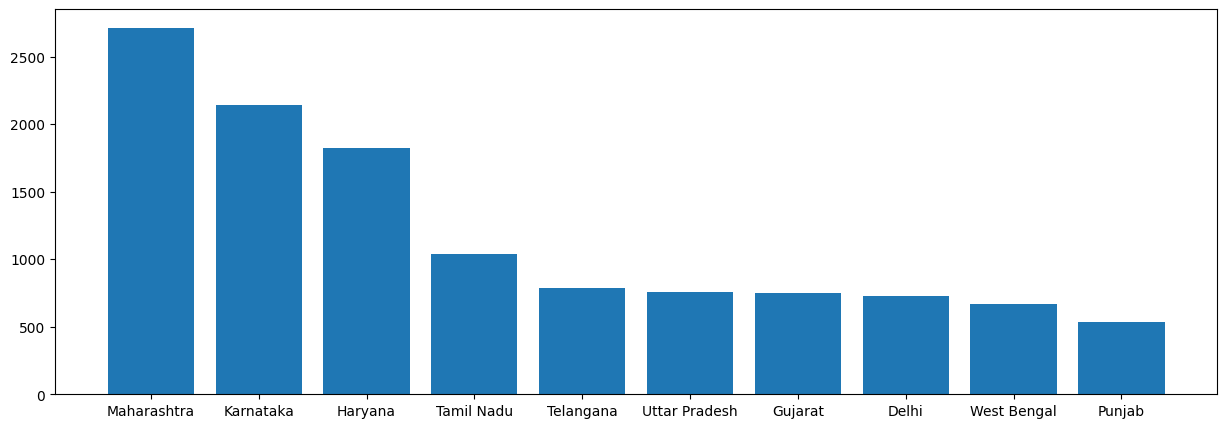

In [ ]:
# Top 10 states from where Delhivery is  getting orders
plt.figure(figsize=(15,5))
plt.bar(trip['source_state'].value_counts()[:10].index,trip['source_state'].value_counts()[:10].values)
plt.show()

In [ ]:
trip['destination_state'].value_counts()

,count
destination_state,
Maharashtra,2561
Karnataka,2294
Haryana,1640
Tamil Nadu,1084
Uttar Pradesh,805
Telangana,784
Gujarat,734
West Bengal,697
Delhi,657


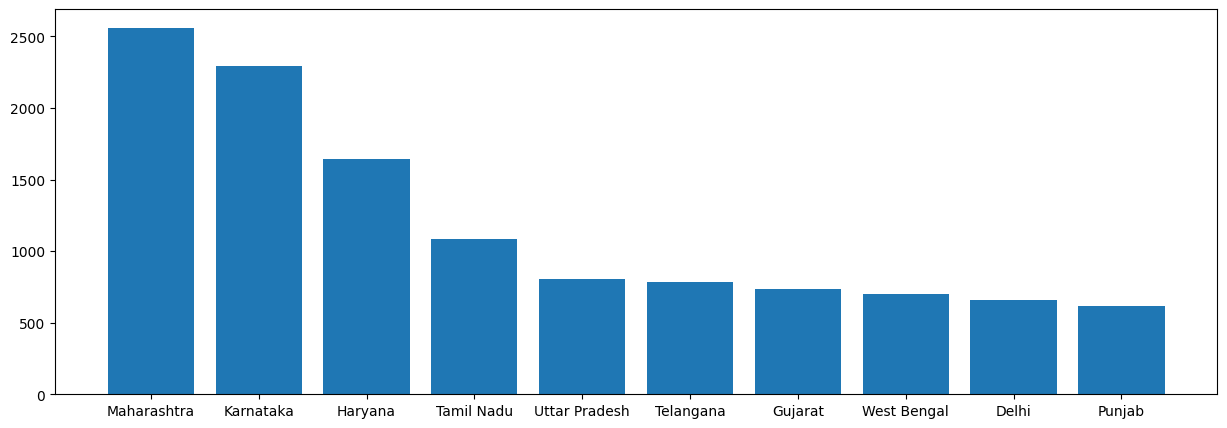

In [ ]:
## Top 10 states from destination states
plt.figure(figsize=(15,5))
plt.bar(trip['destination_state'].value_counts()[:10].index,trip['destination_state'].value_counts()[:10].values)
plt.show()

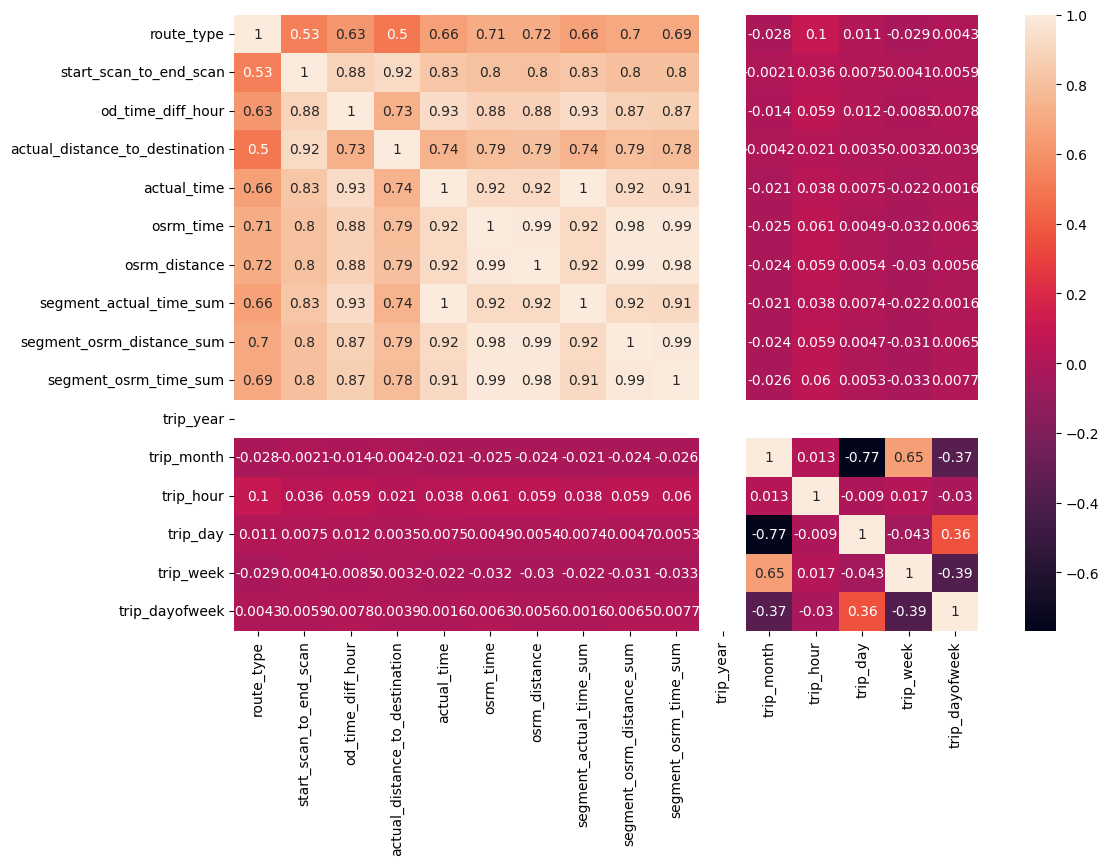

In [ ]:
# Select only numeric columns before calculating correlation
numeric_trip = trip.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(numeric_trip.corr(), annot=True)
plt.show()

# **Business Insights**
By doing Hypothesis testing between osrm data and actual data, we can observe that mean of both data is not the same.

Distance and time attributes are highly correlated, so its obvious that distance between places will matter in speedy delivery

Maximum orders are found from Maharashtra, so we can say more customers in the state.

Minimum trips are from North-Eastern states so business needs improvement in that states




# **Recommendations**
From the above analysis, It can be observed that the actual time taken for delivery is higher compared to osrm time. So we can optimize our services using osrm.


In Maharashtra, we have the highest number of trips, so we should increase outlets in the state.

In North-Eastern states, we have very less business, so we need to optimize their condition and also provide marketing to increase services.

Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.

If Issue is not related to delivery and logistic process then should focus on identifying best route to move packages quickly.